In [13]:
import pandas as pd
import altair as alt
import pycountry_convert as pc

co2_df = pd.read_csv('ds4200_project_co2_data.csv')

In [14]:
# add continent column for easier categorization in visualization 

co2_cont = co2_df
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return country_name   
co2_cont['continent'] = co2_cont['country'].apply(country_to_continent)

continents = ['Africa', 'Asia', 'North America', 'South America', 'Europe', 'Oceania']
co2_cont = co2_cont.loc[co2_cont['continent'].isin(continents)] # clean

co2_cont_yrs = co2_cont.loc[co2_cont['year'] > 1999] # since 2000

co2_cont_yrs.head()

,Unnamed: 0,index,country,year,iso_code,population,gdp,co2,co2_including_luc,co2_growth_prct,...,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,trade_co2,other_industry_co2,continent
10,10,150,Afghanistan,2000,AFG,19542986.0,1.128379e+10,1.047,0.205,-4.078,...,0.177,0.010,0.004,0.022,0.224,-0.843,0.788,NaN,NaN,Asia
11,11,151,Afghanistan,2001,AFG,19688634.0,1.102127e+10,1.069,1.372,2.098,...,0.229,0.007,0.070,0.022,0.209,0.303,0.762,NaN,NaN,Asia
12,12,152,Afghanistan,2002,AFG,21000258.0,1.880487e+10,1.341,8.913,25.432,...,0.303,0.011,0.055,0.000,0.547,7.572,0.727,NaN,NaN,Asia
13,13,153,Afghanistan,2003,AFG,22645136.0,2.107434e+10,1.560,5.332,16.302,...,0.299,0.010,0.092,0.000,0.466,3.773,0.992,NaN,NaN,Asia
14,14,154,Afghanistan,2004,AFG,23553554.0,2.233257e+10,1.237,3.405,-20.669,...,0.257,0.010,0.092,0.000,0.227,2.167,0.909,NaN,NaN,Asia


In [15]:
# CO2 plot
co2 = alt.Chart(co2_cont_yrs).mark_line(
    point=True
).encode(
    alt.Color('continent:N', title='Continent', scale=alt.Scale(scheme='tableau10')),
    alt.X("year:Q", title='Year', axis=alt.Axis(format=".0f")),
    alt.Y("sum(co2_including_luc):Q", title='Sum of CO2 Emissions', axis=alt.Axis(format="e")),
    order=alt.Order('year'),
).properties(
    width=500, height=400,
    title=alt.Title('CO2 Emissions by Continent Since 2000', fontSize=18)
)

# GDP plot
gdp = alt.Chart(co2_cont_yrs).mark_line(
    point=True
).encode(
    alt.Color('continent:N', title='Continent', scale=alt.Scale(scheme='tableau10')),
    alt.X("year:Q", title='Year', axis=alt.Axis(format=".0f")),
    alt.Y("sum(gdp):Q", title='Sum of GDP', axis=alt.Axis(format="e")),
    order=alt.Order('year'),
).properties(
    width=500, height=400,
    title=alt.Title('GDP by Continent Since 2000', fontSize=18)
)

# combine and format font and font size
combined = co2 | gdp
combined.configure(
    font='monospace'
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    labelFontSize=14,
    titleFontSize=16
)

alt.HConcatChart(...)

In [16]:
# make new df of CO2 industries
industries_co2 = co2_df[['cement_co2', 'coal_co2',
       'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2',
       'other_industry_co2']]
industries_co2.head()

,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,0.046,0.278,0.026,0.403,0.189,1.271,NaN
1,0.046,0.250,0.026,0.389,0.023,1.204,NaN
2,0.046,0.022,0.022,0.363,-1.640,1.030,NaN
3,0.047,0.018,0.022,0.352,-4.044,1.048,NaN
4,0.047,0.015,0.022,0.338,-3.616,1.032,NaN


In [17]:
# print dictionary of sums, used in 'static2_d3.js'
dict(industries_co2.sum(axis=0))

{'cement_co2': 156181.053,
 'coal_co2': 1741908.6660000002,
 'flaring_co2': 54122.888,
 'gas_co2': 924634.226,
 'land_use_change_co2': 873080.804,
 'oil_co2': 1606441.2540000002,
 'other_industry_co2': 38867.2}

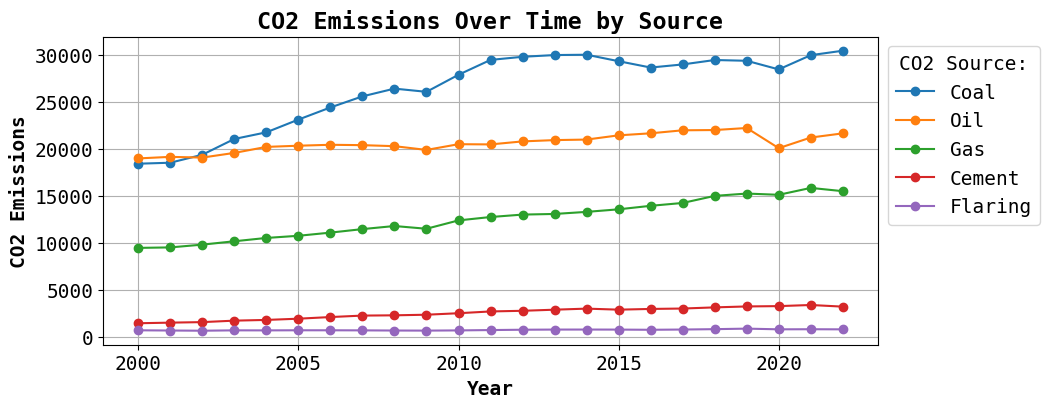

In [35]:
# lists for attributes and associated names
s_attr = ['coal_co2', 'oil_co2','gas_co2','cement_co2', 'flaring_co2']
s_names = ['Coal','Oil','Gas','Cement','Flaring']

co2_cont_yrs = co2_cont_yrs.sort_values(['year'])

# matplotlib plot
from matplotlib import pyplot as plt
for s in s_attr:
    y = co2_cont_yrs.groupby(['year'])[f'{s}'].sum()
    plt.plot(co2_cont_yrs['year'].unique(), y, marker='o',
        label=s_names[s_attr.index(s)])

# formatting and titles
plt.set_cmap('tab10')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('CO2 Emissions', fontweight='bold')
plt.legend(title='CO2 Source:', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.title('CO2 Emissions Over Time by Source', fontweight='bold')
plt.rcParams['figure.figsize'] = [10,4]
plt.rcParams['font.family'] = ['monospace']
plt.rcParams['font.size'] = 14
plt.show()